# DAT565 Assignment 2 – Group 43

- Student 1 - Luca Modica - (5 hours)
- Student 2 - Hugo Alves Henriques E Silva - (5 hours)
- Student 3 - YenPo Lin - (5 hours)

September 8, 2023

## Introduction

WRITE THE INTRODUCTION HERE

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# config inline plots
%matplotlib inline

# set seaborn style
sns.set_style('darkgrid')

## Part 1: Regression

WRITE ABOUT THE REGRESSION TASK INTRODUCTION HERE

### Import Datasets

In [2]:
hemnet_df =pd.read_csv('../datasets/hemnet.csv')
hemnet_df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


### Data cleaning and data selection

Regarding data cleaning and data selection, we selected the `Living_area` and `Selling_price` as those are the 2 features we are going to build our regression model around. After that, we check for null values to make sure that we are reading consistent data.

In [10]:
regression_hemnet_df = hemnet_df[['Living_area', 'Selling_price']] 

In [11]:
regression_hemnet_df.isnull().sum()

Living_area      0
Selling_price    0
dtype: int64

### Data visualization

After doing the data cleaning, we would like to visualize our dataframe in order to have a clear inspection on it.

- x axis: Living_area

- y axis: price

we also define a plot function to avoid repeating the code when every time we need to do so.

- xAxis: Xinput

- yAxis: Yinput

- title: the title of the graph

- xlabel: label depends on the xAxis input

- ylabel: label depends on the yAxis input

In [19]:
def make_scatter_plot(xAxis, yAxis, title, xlabel, ylabel):
    sns.scatterplot(x=xAxis, y=yAxis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

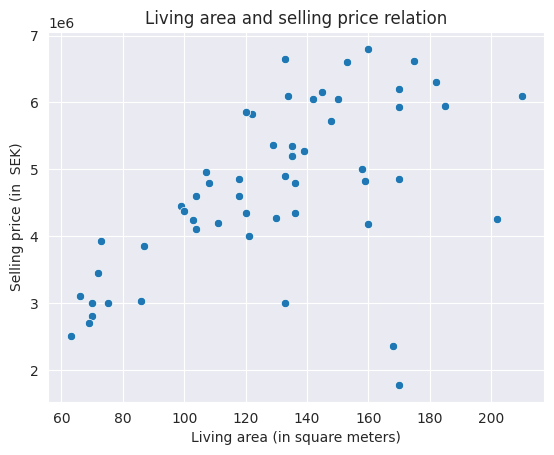

In [23]:
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

### 1. Find a linear regression model that relates the living area to the selling price. If in doing so, you performed any data cleaning step(s), describe what you did and explain why.

Firstly,we imported the LinearRegression model from sklearn library to train our data.

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Feed the data into the trained Regression Model

In [126]:
lr_model = LinearRegression().fit(
    regression_hemnet_df['Living_area'].values.reshape(-1, 1),
    regression_hemnet_df['Selling_price'].values
)

ValueError: Expected 2D array, got 1D array instead:
array=[104  99 133 175 118 133  70 134  70 133 121 136  86 135 130 104  66 129
  75 160  87 182 135 100 202 136 185 153 135  73 120 122  63 150 210 108
 111  72 170 142 170 120 107 135 145 168  69 170 160 170 158 103 148 139
 118 159].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 2. What are the values of the slope and intercept of the regression line?

After the computation, the model would return a set of results. Consist of multiple Slopes of the regression line and Intercept of the regression line. While the most preferrable result will be taken from `ln_model.coef_[0]` and `ln_model.intercept_`.

In [127]:
print(f'Most desirable Slope of the regression line: {lr_model.coef_[0]}')
print(f'Most desirable Intercept of the regression line: {lr_model.intercept_}')

Most desirable Slope of the regression line: 19370.138547331582
Most desirable Intercept of the regression line: 2220603.2433558684


<AxesSubplot: title={'center': 'Living area and selling price relation'}, xlabel='Living area (in square meters)', ylabel='Selling price (in  SEK)'>

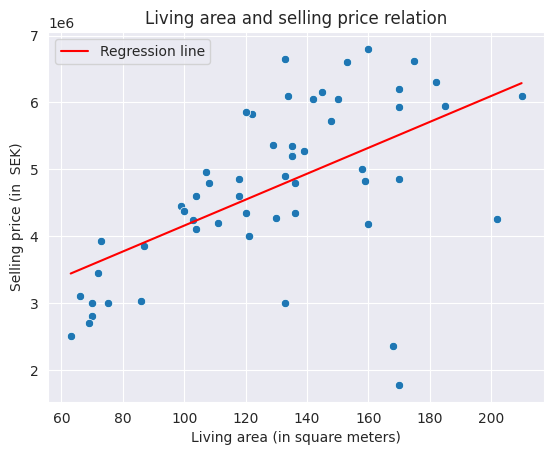

In [128]:
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

# create the regression line
sns.lineplot(
    x=regression_hemnet_df['Living_area'], 
    y=y_line(regression_hemnet_df['Living_area'], lr_model.coef_[0], lr_model.intercept_), 
    label=f'Regression line', 
    color='red'
)

### 3. Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2, and 200 m2.

In [71]:
def linear_function(x, m, b):
    return m * x + b

def y_line(x_line, m, b):
    return [linear_function(x, m, b) for x in x_line]

In [130]:
print(f'The predicted price for 100 m^2 is: {round(linear_function(100,lr_model.coef_[0],lr_model.intercept_),2)} m^2')
print(f'The predicted price for 150 m^2 is: {round(linear_function(150,lr_model.coef_[0],lr_model.intercept_),2)} m^2')
print(f'The predicted price for 200 m^2 is: {round(linear_function(200,lr_model.coef_[0],lr_model.intercept_),2)} m^2')

The predicted price for 100 m^2 is: 4157617.1 m^2
The predicted price for 150 m^2 is: 5126124.03 m^2
The predicted price for 200 m^2 is: 6094630.95 m^2


### 4. Draw a residual plot. Discuss some potential strategies for improving the model.

In [176]:
# function to compute the residual
def residuals(y_actual, y_predicted):
    return np.array([
        regression_hemnet_df['Selling_price'].values - lr_model.predict(regression_hemnet_df['Selling_price'].values.reshape(-1, 1))
    ]).flatten()

In [178]:
standardized_residuals = StandardScaler().fit_transform(
    residuals(
        regression_hemnet_df['Selling_price'], 
        lr_model.predict(regression_hemnet_df['Selling_price'].values.reshape(-1, 1))
    ).reshape(-1, 1)
)

ValueError: Expected 2D array, got 1D array instead:
array=[-8.91002579e+10 -8.61948871e+10 -9.49109995e+10 -1.28322763e+11
 -8.91002579e+10 -1.28806992e+11 -5.42358085e+10 -1.18153966e+11
 -5.81096362e+10 -5.81096362e+10 -7.74787748e+10 -8.42579733e+10
 -5.85938647e+10 -1.01012278e+11 -8.28052879e+10 -7.94156886e+10
 -6.00465501e+10 -1.04014495e+11 -5.81096362e+10 -8.08683740e+10
 -7.45734040e+10 -1.22027793e+11 -1.03627112e+11 -8.46453561e+10
 -8.23210594e+10 -9.29740856e+10 -1.15054904e+11 -1.27838535e+11
 -1.00721741e+11 -7.60260894e+10 -8.42579733e+10 -1.12827453e+11
 -4.84250670e+10 -1.17185509e+11 -1.18153966e+11 -9.29740856e+10
 -8.13526025e+10 -6.68257486e+10 -1.19994034e+11 -1.17185509e+11
 -3.43824415e+10 -1.13311681e+11 -9.60731478e+10 -1.00721741e+11
 -1.19122423e+11 -4.57133876e+10 -5.22988947e+10 -1.14861212e+11
 -1.31712363e+11 -9.39425426e+10 -9.68479133e+10 -8.22242137e+10
 -1.10890539e+11 -1.02174426e+11 -9.39425426e+10 -9.34583141e+10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

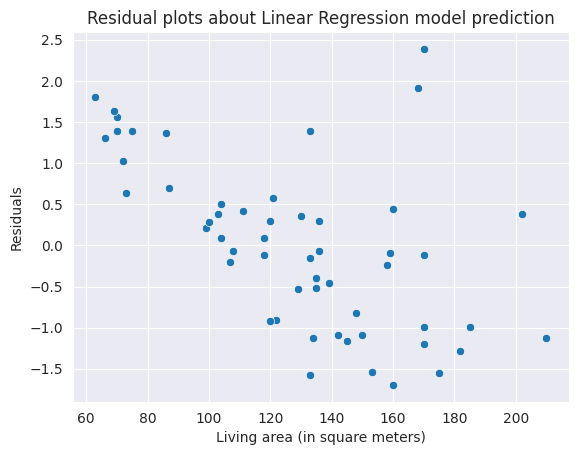

In [179]:
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    standardized_residuals.flatten(),
    'Residual plots about Linear Regression model prediction',
    'Living area (in square meters)',
    'Residuals'
)

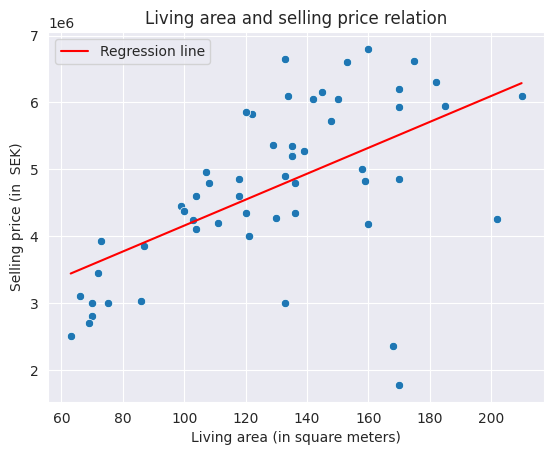

In [148]:
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

# create the regression line
sns.lineplot(
    x=regression_hemnet_df['Living_area'], 
    y=y_line(regression_hemnet_df['Living_area'], lr_model.coef_[0], lr_model.intercept_), 
    label=f'Regression line', 
    color='red'
)
def linear_function_test(x, m, b):
    return m * x + b

# function to compute the residual
def residuals_test(x_actual,y_actual):
    segment=[y_actual[i] - linear_function_test(x_actual[i],lr_model.coef_[0],lr_model.intercept_) for i in range(0, len(y_actual))]
    for i in range(0,len(y_actual)):
        if segment[i]<0:
            plt.axvline(
                x=x_actual[i], 
                ymin=linear_function_test(
                    x_actual[i],
                    lr_model.coef_[0],
                    lr_model.intercept_),
                    ymax=y_actual[i], 
                    color='red', 
                    linestyle='--', 
                    linewidth=2, 
                    label='Vertical Line'
                )
        else:
            plt.axvline(x=x_actual[i], ymin=y_actual[i], ymax=linear_function_test(x_actual[i],lr_model.coef_[0],lr_model.intercept_), color='red', linestyle='--', linewidth=2, label='Vertical Line')



residuals_test(regression_hemnet_df['Living_area'],regression_hemnet_df['Selling_price'])


## Part 2: Classification

WRITE ABOUT THE CLASSIFICATION TASK INTRODUCTION HERE

### Import Libraries

### Import Datasets

In [13]:
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
# Create a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Optionally, you can add the target variable (species) to the DataFrame
iris_df['species'] = iris.target

NameError: name 'iris' is not defined

In [59]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1. Use a confusion matrix to evaluate the use of logistic regression to classify the Iris data set.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Split the data into training and testing set

In [47]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Build the Logistic Regression Model

In [48]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predict the values for the testing set

In [49]:
y_pred = logreg.predict(X_test)

### Evaluate the model using a confusion matrix

In [51]:
confMat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confMat)

Confusion Matrix:
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


## 2. Use k-nearest neighbors to classify the Iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?

### Import Libraries

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Standardize the features

Explain feature standardization

In [88]:
#Initialize the scaler
scaler = StandardScaler()

#Fit the scaler on the training data
scaler.fit(X_train)

#Transform the training and testing data
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

### Build and train the kNN models for different k values. Predict the results for each model and save them

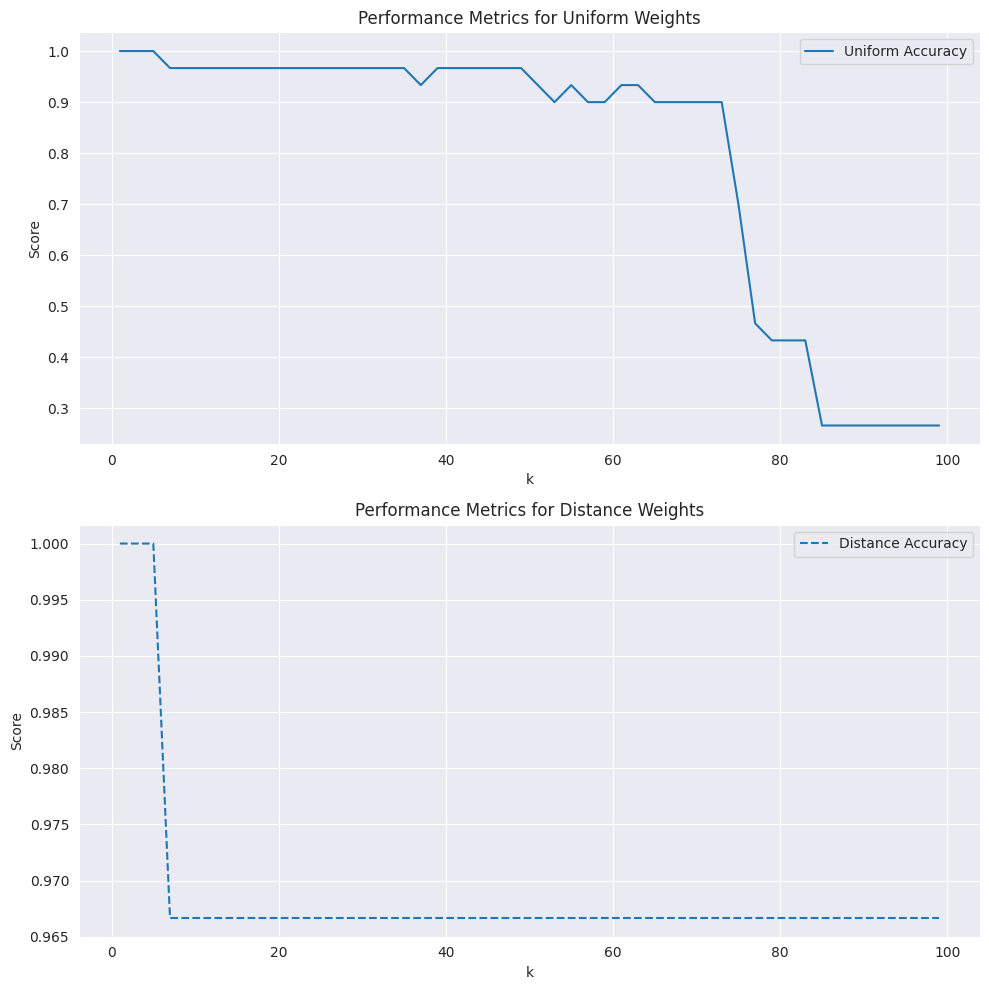

In [110]:
k_values = np.arange(1, 100, 2)
metrics_uniform = []
metrics_distance = []
for k in k_values:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')

    knn_uniform.fit(X_train, y_train)
    knn_weighted.fit(X_train, y_train)

    y_pred_uniform = knn_uniform.predict(X_test)
    y_pred_distance = knn_weighted.predict(X_test)

    # Compute metrics for uniform weights
    metrics_uniform.append(accuracy_score(y_test, y_pred_uniform))

    # Compute metrics for distance weights
    metrics_distance.append(accuracy_score(y_test, y_pred_distance))

# Create subplots: one for uniform weights and one for distance weights
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot metrics for uniform weights

axs[0].plot(k_values, metrics_uniform, label=f'Uniform {metric}')

axs[0].set_xlabel('k')
axs[0].set_ylabel('Score')
axs[0].set_title('Performance Metrics for Uniform Weights')
axs[0].legend()
axs[0].grid(True)

# Plot metrics for distance weights
axs[1].plot(k_values, metrics_distance, label=f'Distance {metric}', linestyle='--')

axs[1].set_xlabel('k')
axs[1].set_ylabel('Score')
axs[1].set_title('Performance Metrics for Distance Weights')
axs[1].legend()
axs[1].grid(True)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

Conclusion.

## 3. Compare the classification models for the Iris data set that are generated by k-nearest neighbors (for the different settings from question 2) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.

why choose kNN or linear model

kNN non linear - e. g. (circles)

logistic regression - linear

conclude whether a linear or a non linear method suits the problem better.

To calculate the confusion matrices, just need to select a k value that shows somewhat of a difference between the 2 kNN models.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8cfa57f0-6d90-4c5d-a7d6-29d1b561f0e2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>